# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

# The Dataset
> ***Brief Description:***
Teenage pregancy is an issue that is barely tackled yet affects most girls from any background. This project leverages the use of ML to help young girls that are at high risk of getting prematurely pregnant to reccomend online resources that they can use to learn more about the phases their bodies undergo hence raising concsienceness and decresing rates of teenage pregnancies.

The dataset used for this model is synthetic due to unavailability of non-generic Rwandan data online. The data includes key features like ***age ranges*** which helped determine ***educational levels***, ***family income*** that helped categorise the social economic classes recognised in Rwanda also commonly known as ***Ubudehe categories***, ***access to health care***, ***sexual education exposure***, and ***contraceptive use*** by different people from different Ubudehe categories. The dataset also includes columns for ***peer influence***, ***parental involvement***, and ***community resources** for proper generation of ***Risk category*** as the target variable.


In [2]:
file_path = 'teenage_pregnancies_in_Rwanda_data.csv'

#Load the data
data = pd.read_csv(file_path)

In [3]:
data

,Age,Education_Level,Ubudehe_Category,Family_Income_Rwf,Healthcare_Access_Score,Sexual_Education_Hours,Contraceptive_Use,Peer_Influence,Parental_Involvement,Community_Resources,Risk_Category
0,17,O'Level,C,39000.0,34,8.7,Never,49,39,33,Medium
1,16,Primary,B,359000.0,80,1.0,Never,81,63,67,Low
2,17,O'Level,C,57000.0,69,4.4,Never,81,54,58,Low
3,18,A'Level,C,40000.0,35,34.1,Regular,76,41,46,Low
4,16,Primary,D,11000.0,42,1.5,Never,38,62,25,Medium
...,...,...,...,...,...,...,...,...,...,...,...
995,16,Primary,D,30000.0,33,1.0,Never,55,49,35,Medium
996,19,O'Level,C,65000.0,57,6.3,Inconsistent,94,47,52,Low
997,17,O'Level,D,14000.0,37,2.8,Never,47,48,44,Medium
998,15,Primary,E,9000.0,18,1.1,Never,33,51,35,Medium


In [4]:
print("Sample of generated data:")
print(data)

print("\nSummary statistics:")
print(data.describe())

print("\nValue counts for categorical variables:")
print("\nEducation Level distribution:")
print(data['Education_Level'].value_counts())
print("\nUbudehe Category distribution:")
print(data['Ubudehe_Category'].value_counts())
print("\nContraceptive Use distribution:")
print(data['Contraceptive_Use'].value_counts())
print("\nRisk Category distribution:")
print(data['Risk_Category'].value_counts())

# Calculate average risk factors by different demographic factors
print("\nAverage risk category distribution by Ubudehe category:")
print(data.groupby('Ubudehe_Category')['Risk_Category'].value_counts(normalize=True))

Sample of generated data:
     Age Education_Level Ubudehe_Category  Family_Income_Rwf  \
0     17         O'Level                C            39000.0   
1     16         Primary                B           359000.0   
2     17         O'Level                C            57000.0   
3     18         A'Level                C            40000.0   
4     16         Primary                D            11000.0   
..   ...             ...              ...                ...   
995   16         Primary                D            30000.0   
996   19         O'Level                C            65000.0   
997   17         O'Level                D            14000.0   
998   15         Primary                E             9000.0   
999   17         O'Level                B           485000.0   

     Healthcare_Access_Score  Sexual_Education_Hours Contraceptive_Use  \
0                         34                     8.7             Never   
1                         80                     1.0     

In [5]:
# dividing the dataset into Train, Validation, and test sets

X = data.drop('Risk_Category', axis=1)
y = data['Risk_Category']

# For the categorical features
X = pd.get_dummies(X, columns=['Education_Level', 'Ubudehe_Category', 'Contraceptive_Use'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [6]:
# one-hot encoding for the risk categories

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# one-hot encoding for the risk categories
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```

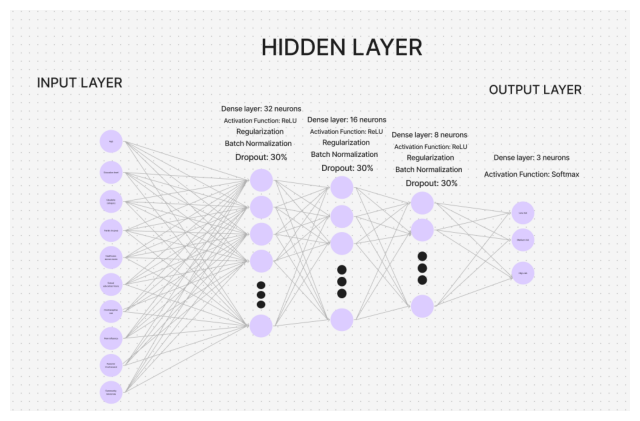

In [7]:
from PIL import Image
import matplotlib.image as mpimg

image_path = "Model_Structure.png" 
img = mpimg.imread(image_path)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#Task: Define a function that creates models without and With specified Optimization techniques


In [8]:
def define_model(optimization: str, regularization_type: str = None, regularization_strength: float = 0.0, early_stopping: bool = False, learning_rate: float = False):
    # Initialize the model
    model = Sequential()

    def get_regularizer(reg_type, reg_strength):
        if reg_type == 'l1':
            return l1(reg_strength) if reg_strength > 0 else None
        elif reg_type == 'l2':
            return l2(reg_strength) if reg_strength > 0 else None
        elif reg_type == 'l1_l2':
            return l1_l2(l1=reg_strength, l2=reg_strength) if reg_strength > 0 else None
        else:
            return None

    # First dense layer with optional L2 regularization
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second dense layer
    model.add(Dense(16, activation='relu',
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third dense layer
    model.add(Dense(8, activation='relu',
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer with 3 neurons for multi-class classification
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimization,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks for early stopping if required
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

    return model, callbacks

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [9]:
def loss_curve_plot(history):
  epochs = range(1, len(history.history['loss']) + 1)

  train_accuracy = history.history.get('accuracy', history.history.get('acc'))
  val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

  plt.figure(figsize=(8, 5))
  plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
  plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation loss')
  plt.title('Training and Validation Loss', fontsize=14)
  plt.xlabel('Epochs', fontsize=12)
  plt.ylabel('Loss', fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.show()

  print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
  print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")
  print(classification_report(y_test, y_pred))

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3785 - loss: 1.5325 - val_accuracy: 0.5200 - val_loss: 1.0645
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4896 - loss: 1.1948 - val_accuracy: 0.6700 - val_loss: 0.9931
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5350 - loss: 1.1020 - val_accuracy: 0.8100 - val_loss: 0.9076
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6256 - loss: 0.9363 - val_accuracy: 0.8800 - val_loss: 0.8091
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6748 - loss: 0.8633 - val_accuracy: 0.8950 - val_loss: 0.7313
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6901 - loss: 0.8455 - val_accuracy: 0.9150 - val_loss: 0.6622
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 0.7746 - val_accuracy: 0.9150 - val_loss: 0.5961
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8063 - loss: 0.6442 - val_accuracy: 0.9150 -

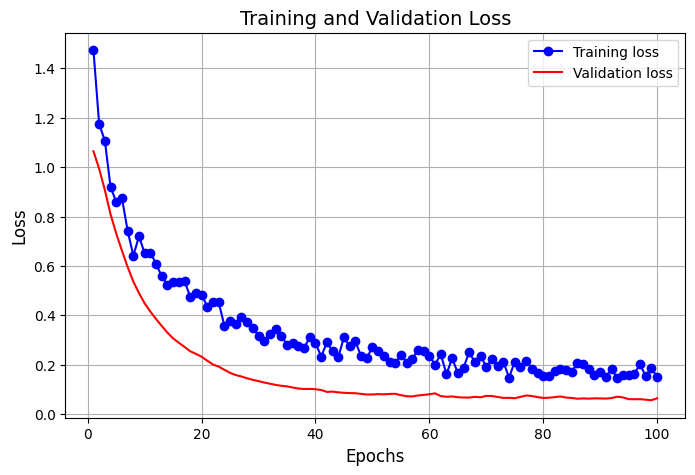

Final Training Accuracy: 0.9483
Final Validation Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        82
           2       0.98      0.98      0.98       116

   micro avg       0.98      0.98      0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.98      0.98       200
 samples avg       0.98      0.98      0.98       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Default model (No optimization techniques)

default_model, _ = define_model(
    optimization='adam',
    regularization_type=None,
    regularization_strength=0.0,
    early_stopping=False,
    learning_rate=0.01
)

history = default_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
)

y_pred = (default_model.predict(X_test) > 0.5).astype(int)
loss_curve_plot(history)

Epoch 1/100


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3120 - loss: 12.7236 - val_accuracy: 0.6100 - val_loss: 11.6360
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4588 - loss: 11.8813 - val_accuracy: 0.7850 - val_loss: 11.0239
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4807 - loss: 11.2071 - val_accuracy: 0.7700 - val_loss: 10.4198
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5322 - loss: 10.5943 - val_accuracy: 0.7750 - val_loss: 9.8376
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5991 - loss: 9.8767 - val_accuracy: 0.7900 - val_loss: 9.2782
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6230 - loss: 9.3246 - val_accuracy: 0.7900 - val_loss: 8.7275
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6310 - loss: 8.7959 - val_accuracy: 0.7950 - val_loss: 8.2106
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6658 - loss: 8.2417 - val_accuracy: 0.7950 - val_l

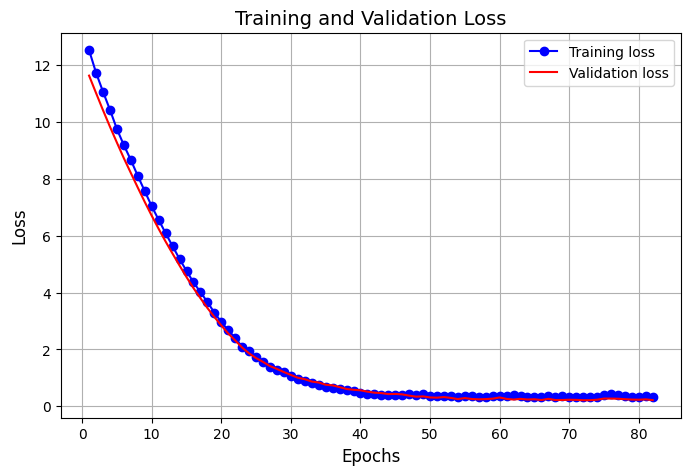

Final Training Accuracy: 0.9350
Final Validation Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        82
           2       0.98      0.97      0.98       116

   micro avg       0.98      0.97      0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.97      0.97       200
 samples avg       0.97      0.97      0.97       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Neural network model 1

nn_model_1, callbacks = define_model(
    optimization='adam',
    regularization_type='l1',
    regularization_strength=0.05,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)
y_pred = (nn_model_1.predict(X_test) > 0.5).astype(int)
loss_curve_plot(history)

Epoch 1/100


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2978 - loss: 6.2298 - val_accuracy: 0.5300 - val_loss: 5.3920
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3388 - loss: 5.7898 - val_accuracy: 0.5050 - val_loss: 5.0603
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4220 - loss: 5.1931 - val_accuracy: 0.6450 - val_loss: 4.7146
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4713 - loss: 4.8044 - val_accuracy: 0.7450 - val_loss: 4.3748
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4862 - loss: 4.4339 - val_accuracy: 0.8150 - val_loss: 4.0523
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5761 - loss: 4.0209 - val_accuracy: 0.8800 - val_loss: 3.7473
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5796 - loss: 3.7860 - val_accuracy: 0.9100 - val_loss: 3.4468
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6845 - loss: 3.4222 - val_accuracy: 0.9350 - val_loss: 3.

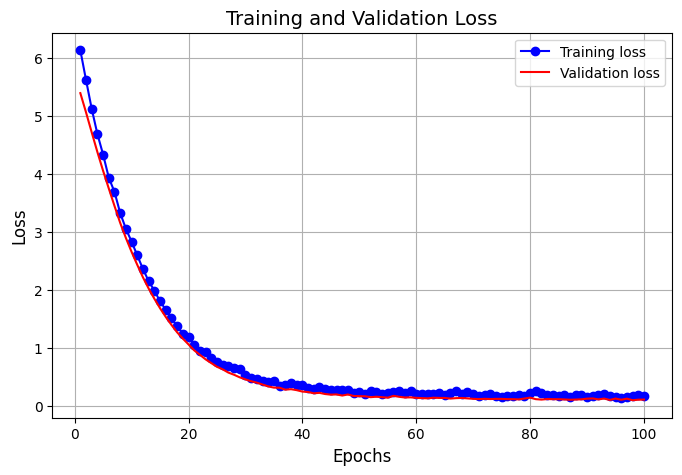

Final Training Accuracy: 0.9650
Final Validation Accuracy: 0.9850
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        82
           2       0.98      0.97      0.98       116

   micro avg       0.98      0.97      0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.97      0.97       200
 samples avg       0.97      0.97      0.97       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Neural network model 2

nn_model_2, callbacks = define_model(
    optimization='adam',
    regularization_type='l2',
    regularization_strength=0.09,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

loss_curve_plot(history)

Epoch 1/100


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4171 - loss: 108.2136 - val_accuracy: 0.4450 - val_loss: 97.1531
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4696 - loss: 94.8818 - val_accuracy: 0.6400 - val_loss: 86.5421
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4425 - loss: 84.5696 - val_accuracy: 0.6650 - val_loss: 76.9546
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4994 - loss: 75.0857 - val_accuracy: 0.6250 - val_loss: 67.9761
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5497 - loss: 66.1698 - val_accuracy: 0.6050 - val_loss: 59.5526
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5354 - loss: 57.9264 - val_accuracy: 0.6000 - val_loss: 51.6633
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5581 - loss: 50.0753 - val_accuracy: 0.5950 - val_loss: 44.4279
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6110 - loss: 42.8734 - val_accuracy: 0.595

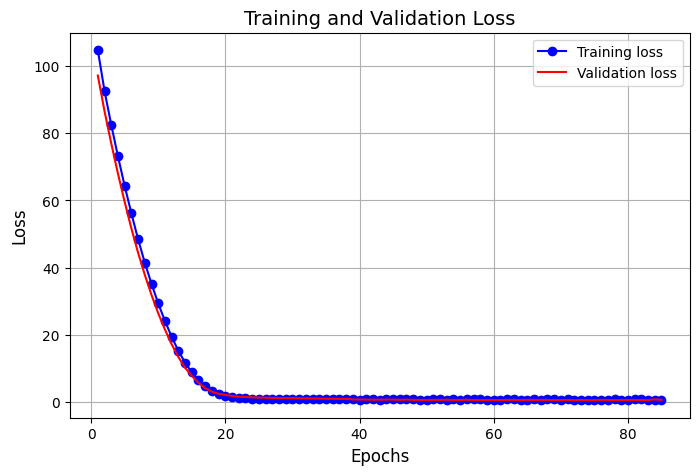

Final Training Accuracy: 0.9067
Final Validation Accuracy: 0.9350
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        82
           2       0.98      0.97      0.98       116

   micro avg       0.98      0.97      0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.97      0.97       200
 samples avg       0.97      0.97      0.97       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Neural network model 3

nn_model_3, callbacks = define_model(
    optimization='RMSProp',
    regularization_type='l1',
    regularization_strength=0.5,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

loss_curve_plot(history)

Epoch 1/100


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4203 - loss: 28.0473 - val_accuracy: 0.7100 - val_loss: 24.2982
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 23.5699 - val_accuracy: 0.8650 - val_loss: 20.5142
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5896 - loss: 19.8175 - val_accuracy: 0.9050 - val_loss: 17.1404
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 16.4517 - val_accuracy: 0.9150 - val_loss: 14.1688
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7066 - loss: 13.5104 - val_accuracy: 0.9350 - val_loss: 11.5561
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 10.8629 - val_accuracy: 0.9550 - val_loss: 9.2897
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7678 - loss: 8.6749 - val_accuracy: 0.8800 - val_loss: 7.3748
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8051 - loss: 6.7846 - val_accuracy: 0.7500 - v

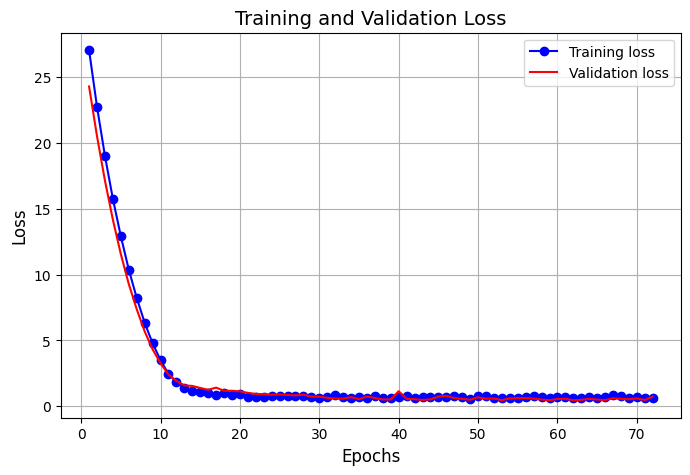

Final Training Accuracy: 0.8967
Final Validation Accuracy: 0.8250


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        82
           2       0.98      0.97      0.98       116

   micro avg       0.98      0.97      0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.97      0.97       200
 samples avg       0.97      0.97      0.97       200



In [14]:
# Neural network model 4

nn_model_4, callbacks = define_model(
    optimization='sgd',
    regularization_type='l1_l2',
    regularization_strength=0.1,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

loss_curve_plot(history)

best_model = 'nn_model_4.h5'
nn_model_4.save(best_model)

In [15]:
# Traditional ml algorithm: SVM
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def svm_model(X_train, y_train, X_test, y_test):
  # one-hot encoding
  y_train = np.argmax(y_train, axis=1)
  y_test = np.argmax(y_test, axis=1)

  model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
  model.fit(
      X_train, y_train
  )

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.2f}")
  return model

svm_model(X_train, y_train, X_test, y_test)

Model Accuracy: 0.94


SVC(random_state=42)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [16]:
def make_predictions(model, X_test):
    # Make predictions
    predictions = model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions = np.argmax(predictions, axis=1)

    return predictions

In [20]:
loaded_model = tf.keras.models.load_model('nn_model_4.h5')

loaded_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

loaded_model.fit(X_test, y_test)

predictions = make_predictions(loaded_model, X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8799 - loss: 0.5496  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Congratulations!!
